# T0 Introducció a l'aprenentatge automàtic

# Índex

1. Què és aprenentatge automàtic?
2. Aprenentatge supervisat
3. Classificació
    * Exemple: classificació de flors iris
    * Anàlisi exploratòria de dades
    * Aprenentatge d'un classificador
    * Minimització del risc empíric
    * Incertesa: models probabilístics
    * Estimació per màxima versemblança
4. Aprenentatge no supervisat: clustering
5. Aprenentatge per reforç
6. L'aprenentatge automàtic i altres àrees
7. Consideracions

# 1 Què és aprenentatge automàtic?

**Arthur Samuel (1959):** $\;$ camp d'estudi que dona als ordinadors l'habilitat d'aprendre sense ser explícitament programats

**Tom Mitchell (1997):** $\;$ un sistema aprén de l'experiència E respecte a una classe de tasques T i una mesura de rendimient R, si el seu rendimient en T, mesurat per R, millora amb E

**Kevin Murphy (2022):**
* Ha ha molts tipus de ML segons Mitchell, depenent de la natura de T, R i E
* Els tipus usuals de ML poden tractar-se convenientment des d'una perspectiva probabilística (estadística)
* L'aproximació probabilística és òptima per a la presa de decisions baix incertesa i emmarca formalment el ML juntament amb moltes altres àrees científiques i enginyeres

# 2 Aprenentatge supervisat

**Aprenentatge supervisat:** $\;$ forma de ML més comuna

**Tasca T:** $\;$ consisteix a aprendre una transformació $f:\mathcal{X}\to\mathcal{Y}$ on
* **Entrades $\boldsymbol{x}\in\mathcal{X}$:** $\;$ solen ser un vector de $D$ característiques reals $\mathcal{X}=\mathbb{R}^D$
* **Eixides $\boldsymbol{y}\in\mathcal{Y}$:** $\;$ solen ser etiquetes de classe (**classificació**) o reals (**regressió**)

**Experiència E:** $\;$ donada per un **conjunt d'entrenament** $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$
* $N$ és la **grandària de la mostra**
* També és usual referir-nos a cada parell $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ com **mostra (d'entrenament)**

**Mesura de rendiment P:** $\;$ depén del tipus d'eixida

# 3 Classificació

**Problema de classificació:** $\;$ l'espai d'eixida és un conjunt de $C$ **etiquetes de classe,** $\;\mathcal{Y}=\{1,2,\dotsc,C\}$

**Reconeixement de formes (pattern recognition):** $\;$ predicció de l'etiqueta de classe d'una entrada donada

**Classificació binària:** $\;$ cas particular en el qual sols tenim dues classes, $\,y\in\{0,1\}\,$ o $\,y\in\{-1,+1\}$

## Exemple: classificació de flors iris

**Classificació de flors iris de les espècies setosa, versicolor i virgínica:** $\;$ exemple clàssic en classificació estadística

<center>

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

</center>

**Espai d'entrada:** $\;\mathcal{X}$ és un conjunt d'imatges que, en general, és de dimensió molt elevada
* *Exemple:* $\;\mathcal{X}=\mathbb{R}^D$ amb $D=C\times D_1\times D_2\,$ per a una imatge a color amb $C=3$ canals i $D_1\times D_2$ píxels
* **Aprenentatge de $f:\mathcal{X}\to\mathcal{Y}$:** $\,$ és molt difícil, encara que certs models avançats aconsegueixen aprendre $f$ en algunes tasques

**Coneixement a priori:** $\;$ coneixement previ sobre la tasca que permet simplificar-la
* **Iris:** la longitud i amplària de sèpals i pètals és altament discriminativa, per la qual cosa podem treballar amb un espai d'entrada de dimensió molt més reduïda que el de les imatges originals, $\mathcal{X}=\mathbb{R}^4$

**Dades tabulades o matriu de dades:** $\;$ matriu de $N$ dades ($N$ files) i $D$ característiques juntament amb les etiquetes de classe ($D+1$ columnes)

**Corpus iris:** $\;$ matriu de $N=150$ mostres descrites amb $D=4$ característiques juntament amb les etiquetes de classe ($50$ per classe)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Anàlisi exploratòria de dades

**Anàlisi exploratòria de dades:** $\;$ estudi preliminar de les dades d'un problema de ML per a familiaritzar-se amb el mateix
* **Detecció de patrons obvis en les dades:** $\;$ si hi ha, per a fer-se una idea de la dificultat del problema i, en definitiva, de quins resultats podem esperar amb diferents mètodes (p.e. lineals o no)
* **Detecció de problemes obvis amb los datos:**
    * **Outliers:** $\;$ dades amb característiques o etiquetes **perdudes** o **incorrectes** (p.e. per trobar-se fora de domini)
    * **Label noise (etiquetes dubtoses):** $\;$ dades amb etiquetes de classe que no estan clares

**Inspecció visual:** $\;$ anàlisi exploratòria de dades mitjançant representació gràfica de les mateixes (si $D$ és reduïda)
* **Gràfic de parells (pair plot):** $\;$ matriu de $D\times D$ gràfics per a característiques individuals (en la diagonal) i a parells (fora)

**Exemple:** $\;$ gràfic de parells per a iris; setosa se separa linealment; setosa i virgínica també se separen prou bé

/home/ajuan/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


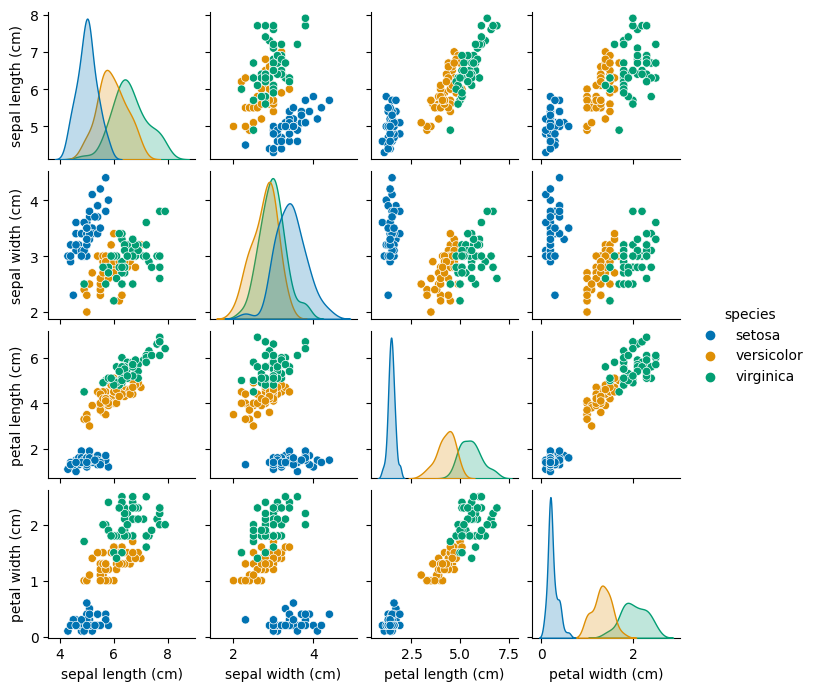

In [2]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

## Aprenentatge d'un classificador

**Aprenentatge d'un classificador o regla de decisió $\,f(\boldsymbol{x};\boldsymbol{\theta})$:** $\;$ sol reduir-se a escollir un valor per al $\boldsymbol{\theta}$ que el governa

**Efecte d'un classificador:** $\;$ particiona l'espai d'entrada en **regions de decisió** separades per **fronteres de decisió**

**Exemple:** regla decisió senzilla per a distingir setosa de no-setosa en iris fent ús de la longitud de pètals ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa si $x\leq 2.45$}\\
\text{versicolor o virgínica si no}
\end{array}\right.$$
En esta regla tenim paràmetres $\,\boldsymbol{\theta}=(2.45),\,$ frontera $\,x=2.45\,$, i regions $\,\mathcal{R}_{\text{setosa}}=\{x\leq 2.45\}\,$ i $\,\mathcal{R}_{\text{no-setosa}}=\{x>2.45\}$

/home/ajuan/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


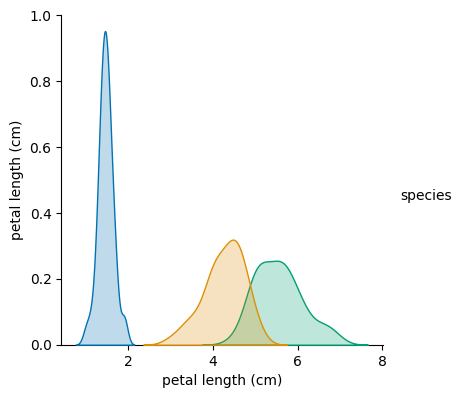

In [3]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 4, palette = 'colorblind');

**Exemple (cont.):** refinament de la regla anterior mitjançant pertició recursiva de regions per a construir un **arbre de decisió;** només afegim una sub-regla per a particionar la regió no-setosa en versicolor i virgínica segons l'amplària de pètals

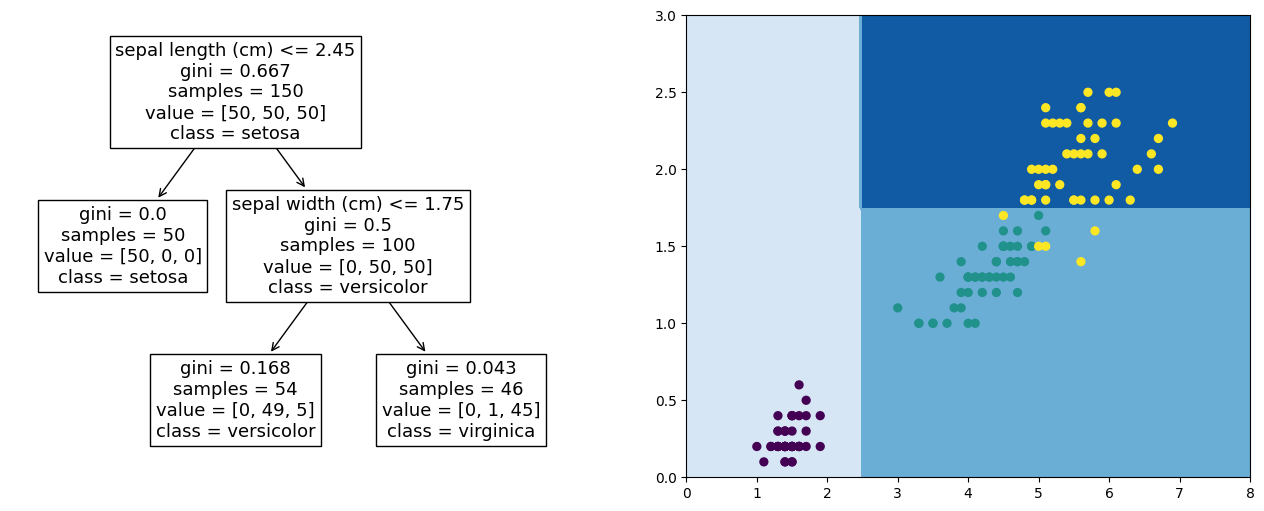

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=list(iris.target_names), ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

## Minimització del risc empíric

**Taxa d'error (en entrenament):** $\;$ mesura de rendiment òbvia per a aprendre el $\boldsymbol{\theta}$ d'un classificador
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\mathbb{I}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))
\quad\text{amb}\quad%
\mathbb{I}(\text{cert})=1,\;\mathbb{I}(\text{fals})=0$$

**Risc empíric:** $\;$ generalitza la taxa d'error mitjançant la introducció d'una **funció de pèrdua** $\ell(y,\hat{y})$ per a mesurar la pèrdua (cost) produïda al classificar una mostra de la classe $y$ en la classe $\hat{y}$
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Pèrdua 01:** $\;\ell_{01}(y,\hat{y})=\mathbb{I}(y\neq\hat{y})$, particularitza el risc empíric a la taxa d'error

**Funcions de pèrdua usuals:** $\;$ s'usen pérdidas paregudes a la 01, encara que no la 01 exactament, per a facilitar l'aprenentatge

**Minimització del risc empíric:** $\;$ és l'aproximació bàsica a **l'entrenament o ajust del model**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{\boldsymbol{\theta}} \frac{1}{N}\sum_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Generalització òptima:** $\;$ en realitat el vertader objectiu consisteix a minimitzar la pèrdua esperada sobre dades futures encara no vistes, açò és, volem que el model generalitze el millor possible, no que simplement funcione bé amb les dades d'entrenament

## Incertesa: models probabilístics

**Impossibilitat d'aprendre classificadors lliures d'error:** $\;$ a causa de la incertesa de model i dades

**Model probabilístic:** $\;$ per a predir una distribució de probabilitat sobre las classes en comptes d'una sola classe
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{on}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$

## Estimació per màxima versemblança

**Log-pèrdua o neg-log-probabilitat:** $\;$ funció de pèrdua usual per a l'ajust de models probabilístics
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
* Si el model assigna probabilitat ú a la classe correcta, la pèrdua és nul·la;
* Si no, la pèrdua serà positiva i serà més gran quan menor siga la probabilitat assignada a la classe correcta

**Neg-log-versemblança (NLL):** $\;$ risc empíric amb log-pèrdua
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

**Estimador màximo-versemblant (MLE):** $\;$ vector de paràmetres que minimitza la NLL
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})$$
* El MLE s'utilitza molt freqüentment per a ajustar models a partir de dades d'entrenament

**Exemple:** $\;$ model probabilístic senzill (**regressió logística**) per a iris usant la longitud i amplària de pètals; després del seu ajust per màxima versemblança, classifiquem cada entrada possible en la classe de major probabilitat segons el model

W= [[ 11.12767979   3.22717485 -14.35485463]
 [ -2.74866104   0.08356447   2.66509657]
 [ -1.16890756  -0.90803047   2.07693804]]


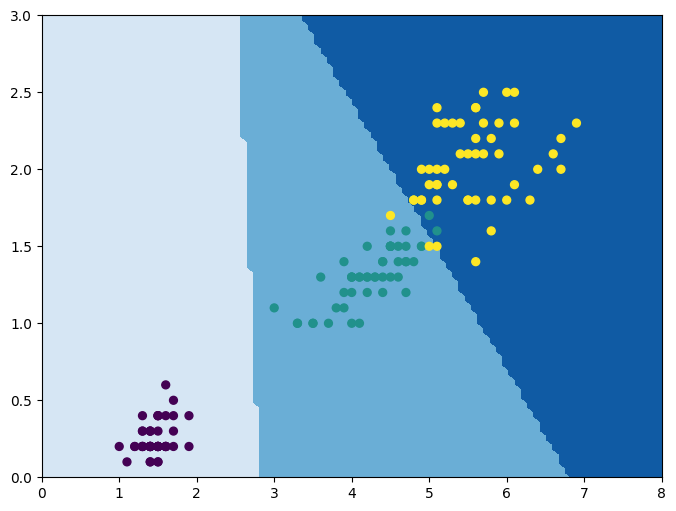

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);

# 4 Aprenentatge no supervisat

**Aprenentatge no supervisat:** $\;$ tracta "d'explicar" les dades quan sols tenim un conjunt "d'entrades", $\mathcal{D}=\{\boldsymbol{x}_n\}_{n=1}^N$, sense les seues corresponents "eixides" $\{\boldsymbol{y}_n\}$

**Aproximació probabilística:** $\;$ ajusta un modelo incondicional $p(\boldsymbol{x})$, en comptes d'un condicional $p(\boldsymbol{y}\mid\boldsymbol{x})$ com en aprenentatge supervisat

**Major aplicabilitat:** $\;$ de l'aprenentatge no supervisat que el supervisat
* Es deu a que les dades no supervisades són fàcils d'aconseguir; no així la supervisió
* A més, l'aprenentatge no supervisat pot aplicar-se a tasques mal definides, ja que en principi no requereix disposar d'un conjunt de categories donat, ni tan sols assumir que les dades s'agrupen en un cert nombre de categories donat

## Clustering

**Clustering:** $\:$ àrea clàssica de l'anàlisi exploratòria de dades amb l'objectiu de trobar **agrupaments naturals** de los dades en grups homogenis o **clústers**

**Exemple:** $\;$ clustering d'iris segons longitud i amplària de pètals

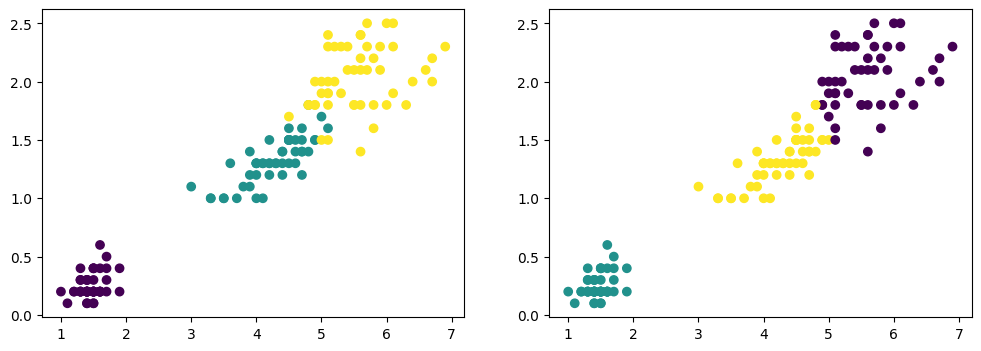

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris(); X = iris.data[:, [2, 3]]; y = iris.target
K = 3 # <<< tria nombre de clústers
y_pred = KMeans(n_clusters=K, n_init=1, random_state=42).fit(X).predict(X)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(*X.T, c=y); axes[1].scatter(*X.T, c=y_pred);

# 5 Aprenentatge per reforç

**Aprenentage per reforç (RL, reinforcement learning):** $\;$ el sistema o **agent** interacciona amb el seu entorn mitjançant una **política** $\boldsymbol{a}=\pi(\boldsymbol{x})$ que especifica quina acció prendre en resposta a cada entrada possible $\boldsymbol{x}$ (derivada de l'estat de l'entorn)
* **També anomenat learning with a critic:** $\;$ per comparació amb **l'aprenentatge supervisat** o **learning with a teacher,** ja que al sistema no se li ensenya l'acció òptima a prendre en cada pas, sinó que rep una **recompensa (o castic)** ocasional en resposta a les accions que pren
* *Exemples:* $\;$ moviment de la nau en Space Invaders o el control motor d'un robot que deu realitzar certa tasca

**Gran aplicabilitat i dificultat:** $\;$ encara que és molt popular per la seu gran aplicabilitat, és molt difícil ja que la recompensa sols s'obté ocasionalment i l'agent pot no conèixer quines de les seues múltiples accions l'originaren

# 6 L'aprenentatge automàtic i altres àrees

**Anàlisi predictiva (predictive analytics):** $\;$ similar al ML, se centra en aplicacions de negocis com l'administració de relacions amb el client, anàlisi de cobraments i predicció de cartera

**Mineria de dades:** $\;$ cobreix tant l'aprenentatge supervisat como no supervisat, però s'orienta a bases de dades (estructurades)

**Ciència de dades:** $\;$ empra tècniques de ML i estadística, però des d'una òptica més estadística, fent èmfasi en la integració i visualització de dades, així com en el paper de l'analista de dades i l'anàlisi experta del dominio

**IA simbòlica:** $\;$ basada en la lògica, el processament de llistes simbòliques i el coneixement expert; decaigué en els 90, la **IA moderna** és sinònim de ML i xarxes neuronals

**Bases del ML:** $\;$ probabilitat, estadística, teories de la decisió i informació, algebra lineal i optimització

# 7 Consideracions

**Problema de l'alineament:** $\;$ discrepància entre el que demanem als nostres algorismes que optimitzen y el que en realitat volem que facen per nosaltres

**Ètica i seguretat de la IA:** $\;$ l'extraordinari avanç de la IA en els últims anys ha provocat gran preocupació tant per l'eticitat dels sistemes desenvolupats (el que volem que facen i possibles usos) com per la seua seguretat (el que realment els hem demanat i usos no desitjats)

**Intel·ligència artificial general (AGI, artificial general intelligence):** $\;$ la visió clàssica de la IA estableix que arribarem a sistemes AGI mitjançant el desenvolupament de sistemes cada vegada més avançats, que prenguen decisions pel seu compte, sense intervenció humana

**Intel·ligència augmentada:** $\;$ visió alternativa de la IA segons la qual els sistemes IA són eines intel·ligents que mantenen el control humà en la presa de decisions; encara que les eines IA siguen cada vegada més autònomas, l'objectiu és facilitar el treball de les persones, no emular-les o superar-les

**Regulació de la IA:** $\;$ des de juny de 2023, l'ús de la IA a la UE està regulat per la Llei d'Intel·ligència Artificial, la qual estableix obligacions per a proveïdors i usuaris en funció del nivell de risc de la IA (inacceptable, alt i limitat)